In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고무시

In [3]:
# boston 데이타셋 로드 
boston = load_boston()

# boston 데이타셋 DataFrame 변환
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# target array로 주택가격(price)을 추가함.
df['PRICE'] = boston.target
print('Boston 데이타셋 크기 :', df.shape)
df.head(2)

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


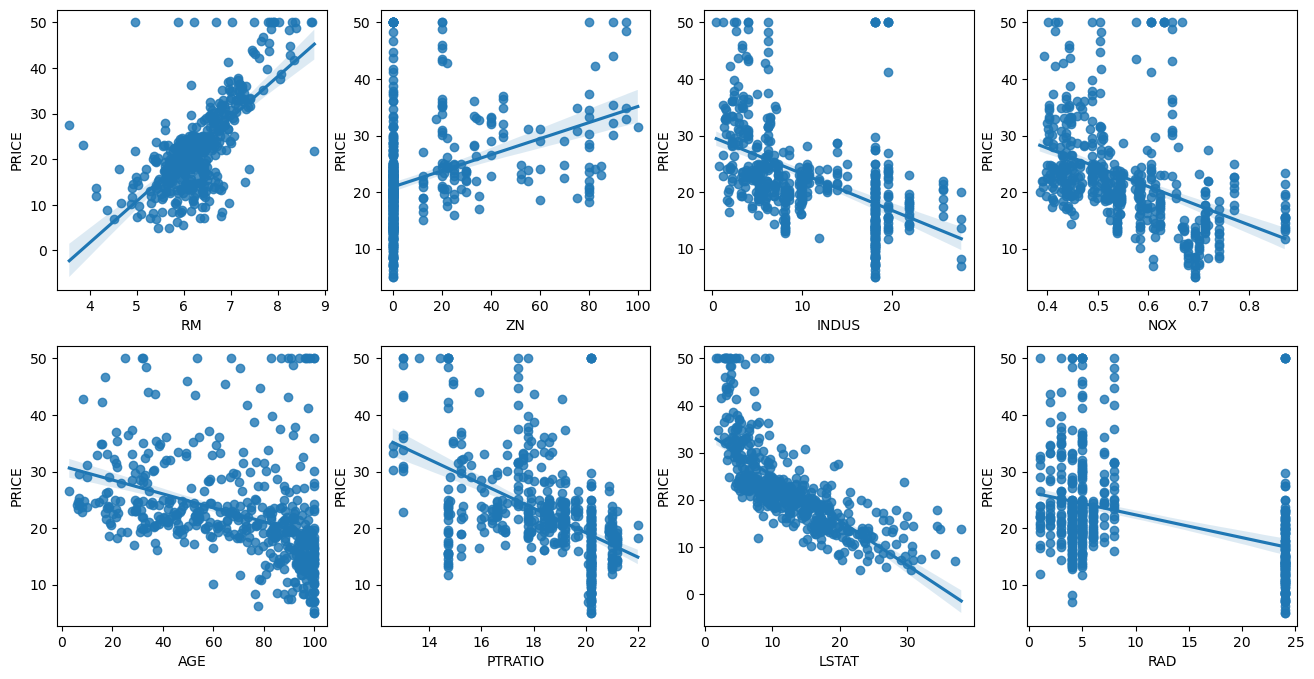

In [4]:
# 2x4 subplot 이용. axs는 4x2 
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4
    
    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
        # m_s_e, r2(선형회귀모델 적합도 : 분산값, 1에 가까울수록 적합도 높음)

# feature, target 데이터 분리
y_target = df['PRICE'] # 레이블(종속변수)
X_data = df.drop(['PRICE'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

# Linear Regression 
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습 
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
print(X_train.shape, X_test.shape)

(354, 13) (152, 13)


In [8]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test) 
y_preds[0:5]

# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 17.297, RMSE: 4.159
Variance score : 0.757


In [9]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))  

절편 값: 40.99559517216412
회귀계수: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [10]:
# 회귀계수 정렬 (내림차순, 큰 값부터)
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [11]:
from sklearn.model_selection import cross_val_score

# features, target 데이터 정의 
y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis=1)

# 선형회귀 객체 생성
lr = LinearRegression()
lr
LinearRegression()
# 5 folds 의 개별 Negative MSE scores (음수로 만들어 작은 오류 값이 더 큰 숫자로 인식됨)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    # cv는 교차검증의 폴드 수
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [15]:
# RMSE를 구하기 위해선 MSE 값에 -1을 곱한 후 평균을 내면 된다
rmse_scores =  np.sqrt(-1*neg_mse_scores)
rmse_scores
# cross_val_score() # shift + tab, tab 으로 함수 확인

# 5 fold 의 평균 RMSE
avg_rmse = np.mean(rmse_scores)
avg_rmse

5.8286589462158345

In [16]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 folds 의 평균 RMSE : {avg_rmse:.3f}')

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829
